# 👉 **Objective**: Determine the output $y(n) = x(n) * h(n)$ using the **convolution sum**.
## 📝 Question Statement

Given:

* Impulse response of the system:

  $$
  h(n) = u(n) - u(n - 5)
  $$

  This means $h(n) = 1$ for $n = 0, 1, 2, 3, 4$, and $0$ elsewhere (a rectangular pulse of length 5).

* Input signal:

  $$
  x(n) = u(n)
  $$

  This is the unit step signal, i.e., $x(n) = 1$ for $n \geq 0$, 0 otherwise.



---

## 📘 Theory: Convolution Sum

The output of a discrete-time **Linear Time-Invariant (LTI)** system is:

$$
y(n) = x(n) * h(n) = \sum_{k=-\infty}^{\infty} x(k) \cdot h(n - k)
$$

For causal signals, the limits are adjusted accordingly.

---
Certainly! Let's manually compute the **convolution sum** step by step between:

* $x[n] = u(n)$: Unit step signal
* $h[n] = u(n) - u(n-5)$: Rectangular pulse of 5 samples (i.e., $h[n] = 1$ for $n = 0, 1, 2, 3, 4$; 0 otherwise)

---

## 🧮 Step-by-Step Manual Computation

Since $x[k] = 1$ for $k \geq 0$, and $h[n - k] = 1$ only when $0 \leq n - k \leq 4$, we can adjust the limits of the sum accordingly.

We compute the convolution for a few values of $n$:

---

### 🔹 For $n = 0$:

$$
y[0] = \sum_{k=0}^{0} x[k] \cdot h[0 - k] = x[0] \cdot h[0] = 1 \cdot 1 = 1
$$

---

### 🔹 For $n = 1$:

$$
y[1] = \sum_{k=0}^{1} x[k] \cdot h[1 - k] = x[0] \cdot h[1] + x[1] \cdot h[0] = 1 \cdot 1 + 1 \cdot 1 = 2
$$

---

### 🔹 For $n = 2$:

$$
y[2] = \sum_{k=0}^{2} x[k] \cdot h[2 - k] = x[0] \cdot h[2] + x[1] \cdot h[1] + x[2] \cdot h[0] = 1 + 1 + 1 = 3
$$

---

### 🔹 For $n = 3$:

$$
y[3] = \sum_{k=0}^{3} x[k] \cdot h[3 - k] = x[0] \cdot h[3] + x[1] \cdot h[2] + x[2] \cdot h[1] + x[3] \cdot h[0] = 1 + 1 + 1 + 1 = 4
$$

---

### 🔹 For $n = 4$:

$$
y[4] = \sum_{k=0}^{4} x[k] \cdot h[4 - k] = x[0] \cdot h[4] + x[1] \cdot h[3] + x[2] \cdot h[2] + x[3] \cdot h[1] + x[4] \cdot h[0] = 1+1+1+1+1 = 5
$$

---

### 🔹 For $n = 5$:

$$
y[5] = \sum_{k=0}^{5} x[k] \cdot h[5 - k] = x[1] \cdot h[4] + x[2] \cdot h[3] + x[3] \cdot h[2] + x[4] \cdot h[1] + x[5] \cdot h[0] = 1+1+1+1+1 = 5
$$

(Here $h[5 - 0] = h[5] = 0$, so $x[0] \cdot h[5] = 0$, that's why $k$ from 1 to 5 contribute.)

---

### 🔹 General Pattern:

* For $n = 0$ to $4$: Output increases linearly → $y[n] = n + 1$
* For $n \geq 4$: Output saturates → $y[n] = 5$

---

## ✅ Final Result Table

|  n  | y\[n] |
| :-: | :---: |
|  0  |   1   |
|  1  |   2   |
|  2  |   3   |
|  3  |   4   |
|  4  |   5   |
|  5  |   5   |
|  6  |   5   |
|  7  |   5   |
| ... |  ...  |

---

Would you like a LaTeX-formatted PDF for this explanation as well?


## ✅ Output Interpretation:

Since:

* $x(n) = 1$ for all $n \geq 0$
* $h(n) = 1$ for $n = 0$ to $4$

The output becomes a **running sum of 5 ones**, starting at $n = 0$. So:

$$
y(n) =
\begin{cases}
1, & n = 0 \\
2, & n = 1 \\
3, & n = 2 \\
4, & n = 3 \\
5, & n \geq 4
\end{cases}
$$

After $n = 4$, the output remains **constant at 5** (convolution of step with a length-5 pulse).

---

Would you like the output values printed as a table as well?


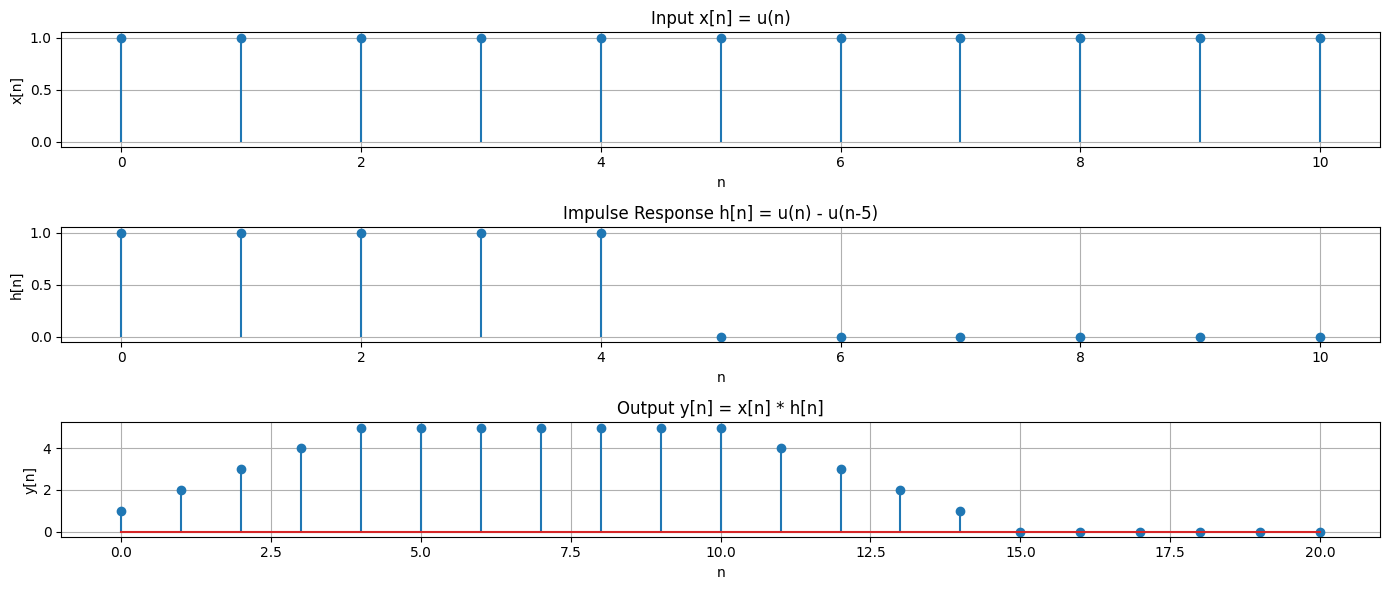

In [1]:
## 🐍 Python Code with Documentation
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the unit step function
def unit_step(n):
    """Generates unit step signal u(n)"""
    return np.array([1 if i >= 0 else 0 for i in n])

# Step 2: Define the range of n
n = np.arange(0, 11)  # We compute for 20 samples to see output behavior

# Step 3: Define x[n] = u(n)
x = unit_step(n)

# Step 4: Define h[n] = u(n) - u(n-5) => rectangular pulse of 5 samples
h = unit_step(n) - unit_step(n - 5)

# Step 5: Perform convolution: y[n] = x[n] * h[n]
y = np.convolve(x, h)

# Step 6: Define time index for output
n_y = np.arange(0, len(y))

# Step 7: Plot x[n], h[n], and y[n]
plt.figure(figsize=(14, 6))

plt.subplot(3, 1, 1)
plt.stem(n, x, basefmt=" ")
plt.title("Input x[n] = u(n)")
plt.xlabel("n")
plt.ylabel("x[n]")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.stem(n, h, basefmt=" ")
plt.title("Impulse Response h[n] = u(n) - u(n-5)")
plt.xlabel("n")
plt.ylabel("h[n]")
plt.grid(True)

plt.subplot(3, 1, 3)
plt.stem(n_y, y)
plt.title("Output y[n] = x[n] * h[n]")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.grid(True)

plt.tight_layout()
plt.show()